<a href="https://colab.research.google.com/github/yogeshjoga/MLproject/blob/main/new_15th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPROTING DATA FROM GEO-DATASETS



> HERE THE ARCHITECTURE OF PROJECT


# Here's a documented version of the provided code:

### Explanation:

1. **Import Libraries**:
    - Import necessary libraries including `pandas`, `numpy`, `matplotlib`, `seaborn`, and various `sklearn` modules for data processing, plotting, and machine learning.

2. **Load Excel File**:
    - Load the Excel file containing multiple sheets using `pd.ExcelFile`.

3. **Dictionary to Store PCA Results**:
    - Initialize an empty dictionary `pca_results` to store PCA results for each sheet.

4. **Iterate Over Sheets**:
    - Loop through each sheet in the Excel file.
    - Read each sheet into a DataFrame using `pd.read_excel`.

5. **Check for Required Columns**:
    - Ensure the column 'log2(fold change)' exists. If not, print a warning and skip the sheet.

6. **Create Synthetic Feature**:
    - Add a synthetic feature by introducing some noise to the 'log2(fold change)' column.

7. **Standardize Data**:
    - Standardize the relevant data columns using `StandardScaler`.

8. **Perform PCA**:
    - Apply PCA to reduce the data to 2 principal components.
    - Store the PCA results along with the 'Gene.symbol' column in a DataFrame.

9. **Store PCA Results**:
    - Save the PCA DataFrame in the `pca_results` dictionary with the sheet name as the key.

10. **Save PCA Results to Excel**:
    - Check if there are any valid PCA results.
    - If there are, write each PCA DataFrame to a new sheet in an output Excel file.
    - Use `pd.ExcelWriter` to create the output Excel workbook and save each DataFrame.

11. **Error Handling**:
    - Handle any exceptions that occur during the processing of each sheet and print relevant error messages.

This code processes each sheet in the given Excel file, performs PCA, and saves the results to a new Excel file while handling errors gracefully.


In [21]:
# Importing Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV, Ridge

# Load the Excel file
file_path = '/content/CleanedDataBook.xlsx'
xls = pd.ExcelFile(file_path)

# Dictionary to store PCA results
pca_results = {}

# Iterate over each sheet in the Excel file
for sheet_name in xls.sheet_names:
    try:
        df = pd.read_excel(xls, sheet_name=sheet_name)

        # Check if the necessary columns 'log2(fold change)' exist
        if 'log2(fold change)' not in df.columns:
            print(f"'log2(fold change)' column not found in sheet: {sheet_name}")
            continue

        # Create a synthetic feature by adding some noise to the existing feature
        df['synthetic_feature'] = df['log2(fold change)'] + np.random.normal(0, 1, len(df))

        # Extract the relevant columns for PCA
        data = df[['log2(fold change)', 'synthetic_feature']]

        # Standardize the data
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data)

        # Perform PCA
        pca = PCA(n_components=2)
        principal_components = pca.fit_transform(scaled_data)

        # Create a DataFrame with the PCA results
        pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
        pca_df['Gene.symbol'] = df['Gene.symbol']

        # Store the results in the dictionary
        pca_results[sheet_name] = pca_df

    except Exception as e:
        print(f"An error occurred while processing sheet: {sheet_name}")
        print(str(e))

# Check if there are any PCA results before attempting to save
if pca_results:
    # Save the PCA results to a new Excel workbook
    output_file_path = '/content/Output.xlsx'
    with pd.ExcelWriter(output_file_path) as writer:
        for sheet_name, pca_df in pca_results.items():
            if not pca_df.empty:
                pca_df.to_excel(writer, sheet_name=sheet_name, index=False)
else:
    print("No valid PCA results to save.")



'log2(fold change)' column not found in sheet: HCC
'log2(fold change)' column not found in sheet: HBVorHCV
'log2(fold change)' column not found in sheet: CIRRHOTIC
'log2(fold change)' column not found in sheet: EARLY
'log2(fold change)' column not found in sheet: DYSPLASTIC NODULE
No valid PCA results to save.


# MERGING DATASETS
Here's a documented version of the provided code:


### Explanation:

1. **Load the Excel File**:
    - Load the Excel file containing PCA results using `pd.ExcelFile(output_file_path)`.

2. **Initialize Combined DataFrame**:
    - Initialize an empty DataFrame `combined_pca_df` to store all PCA results.

3. **Iterate Over Sheets**:
    - Loop through each sheet in the loaded Excel file.
    - Read each sheet into a DataFrame using `pd.read_excel`.

4. **Check for Necessary Columns**:
    - Ensure that each DataFrame contains the columns 'PC1', 'PC2', and 'Gene.symbol'. If any column is missing, print a warning and skip the sheet.

5. **Add Dataset Column**:
    - Add a new column 'Dataset' to each DataFrame to indicate the sheet name, helping to distinguish between different datasets.

6. **Combine DataFrames**:
    - Append the relevant columns ('PC1', 'PC2', 'Dataset') of each DataFrame to `combined_pca_df` using `pd.concat`.

7. **Limit Number of Points**:
    - If the combined DataFrame contains more than `max_points` (1000), randomly sample `max_points` rows to avoid overcrowding the plot.

8. **Define Custom Color Palette**:
    - Create a dark color palette using `sns.color_palette("dark", n_colors=combined_pca_df['Dataset'].nunique())`, where each dataset gets a unique color.

9. **Plot Combined PCA Results**:
    - Create a scatter plot of the combined PCA results using `sns.scatterplot`.
    - Set the figure size, plot title, axis labels, and legend.
    - Save the plot to a file named 'PCA_Plot.png' using `plt.savefig`.

10. **Show Plot**:
    - Display the plot using `plt.show()`.

This code loads PCA results from multiple sheets in an Excel file, combines them into a single DataFrame, and creates a scatter plot with a custom color palette to visualize the PCA results. The plot is then saved to a file.

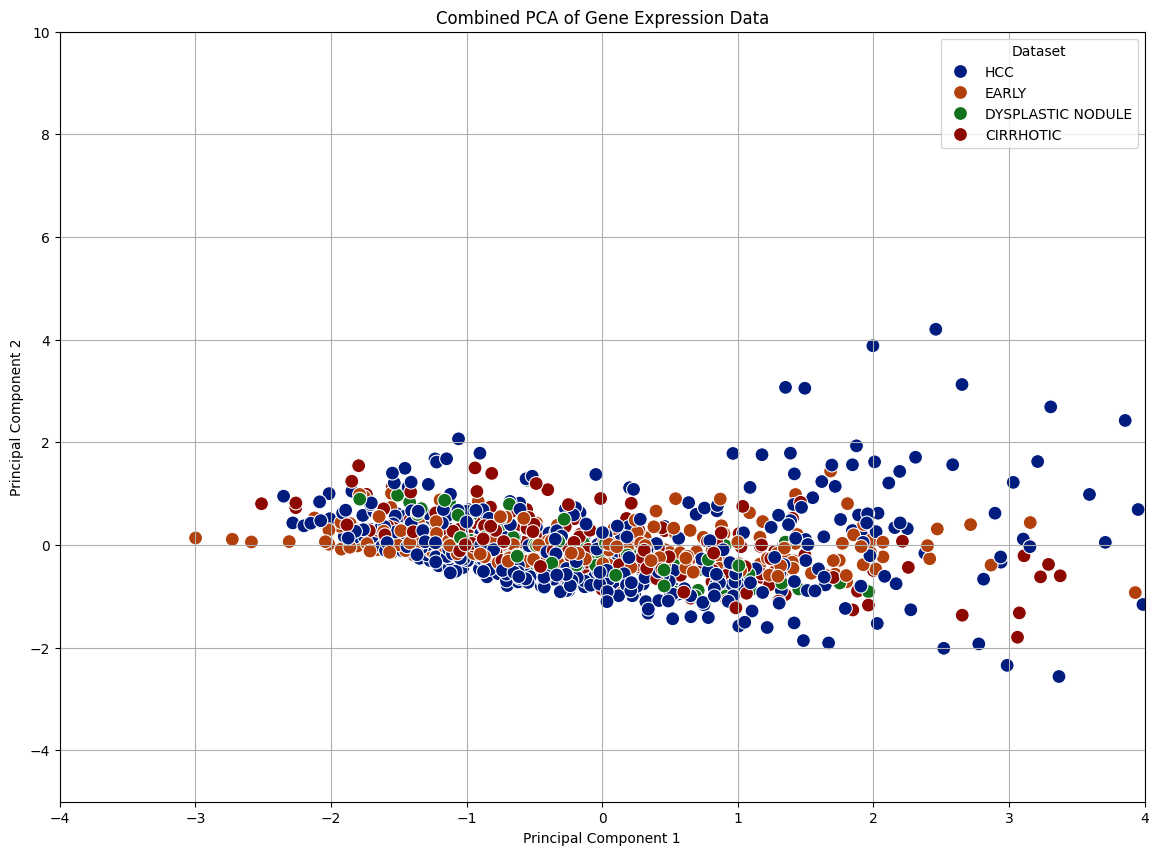

In [34]:
# Load the Excel file
xls = pd.ExcelFile(output_file_path)

# List to store all PCA results
combined_pca_df = pd.DataFrame()

# Iterate over each sheet in the Excel file
for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Check if the necessary columns 'PC1', 'PC2', and 'Gene.symbol' exist
    if 'PC1' not in df.columns or 'PC2' not in df.columns or 'Gene.symbol' not in df.columns:
        print(f"Necessary columns not found in sheet: {sheet_name}")
        continue

    # Add a column for the sheet name to distinguish between different datasets
    df['Dataset'] = sheet_name

    # Append to the combined DataFrame
    combined_pca_df = pd.concat([combined_pca_df, df[['PC1', 'PC2', 'Dataset']]], ignore_index=True)

# Limit the number of points plotted if the dataset is too large
max_points = 1000
if len(combined_pca_df) > max_points:
    combined_pca_df = combined_pca_df.sample(n=max_points, random_state=1)

# Define a custom dark color palette
dark_palette = sns.color_palette("dark", n_colors=combined_pca_df['Dataset'].nunique())

# Plot the combined PCA results with darker colors
plt.figure(figsize=(14, 10))
ax = sns.scatterplot(x='PC1', y='PC2', hue='Dataset', data=combined_pca_df, palette=dark_palette, alpha=1, s=100)

plt.title('Combined PCA of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Dataset', loc='best', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xlim([-4, 4])
plt.ylim([-5, 10])
plt.savefig('PCA_Plot.png')  # Save the plot
plt.show()


# JFKDJKLFJ

PC1        0
PC2        0
Dataset    0
dtype: int64
Optimal alpha: 1e-10
LASSO coefficients: [0.69866571 0.25778708]


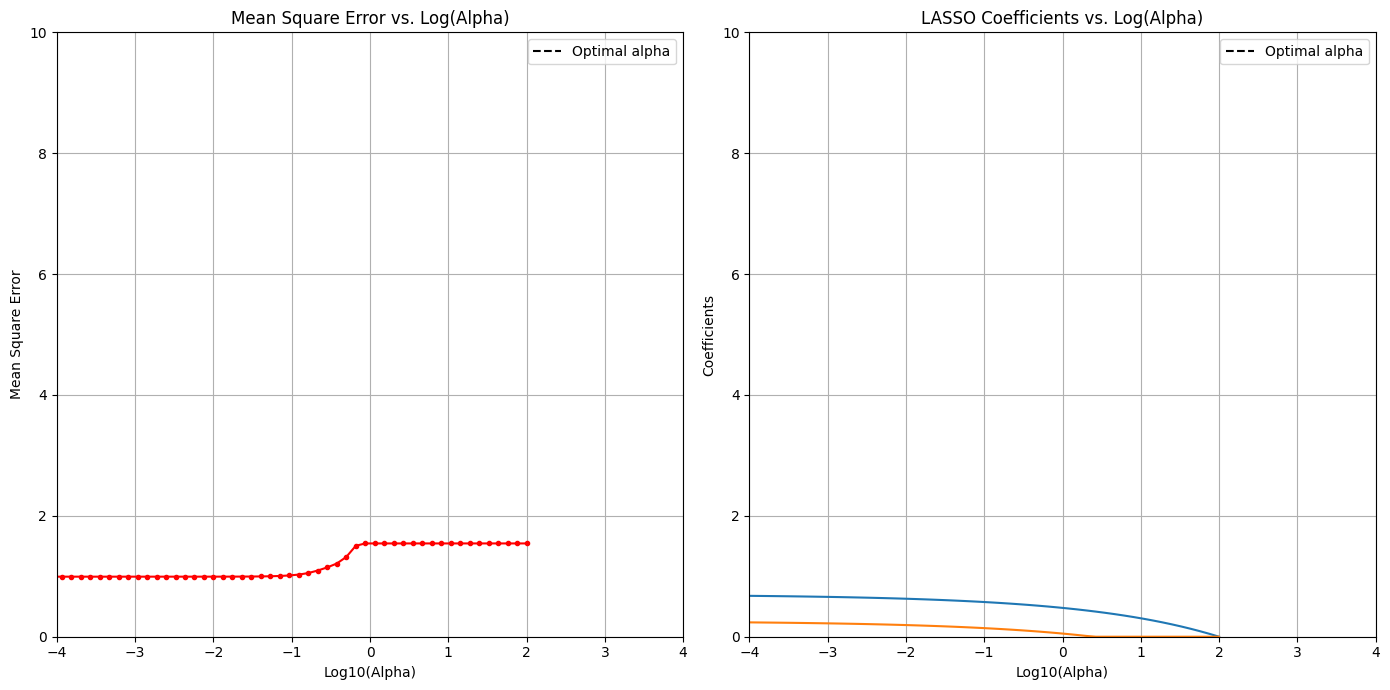

In [35]:
# Combine all PCA results into a single DataFrame
combined_pca_df = pd.DataFrame()

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    if 'PC1' in df.columns and 'PC2' in df.columns and 'Gene.symbol' in df.columns:
        df['Dataset'] = sheet_name
        combined_pca_df = pd.concat([combined_pca_df, df[['PC1', 'PC2', 'Dataset']]], ignore_index=True)

# Check for missing values
print(combined_pca_df.isnull().sum())

# Fill or drop missing values as needed
combined_pca_df.dropna(inplace=True)

# Create a synthetic target variable for the analysis
np.random.seed(42)
combined_pca_df['target'] = combined_pca_df['PC1'] * 0.5 + combined_pca_df['PC2'] * 0.3 + np.random.normal(size=len(combined_pca_df))

# Features and target variable
X = combined_pca_df[['PC1', 'PC2']]
y = combined_pca_df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Perform LASSO regression with cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-10, 2, 100), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Optimal alpha
optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Coefficients
lasso_coefs = lasso_cv.coef_
print(f"LASSO coefficients: {lasso_coefs}")

# Mean square error for each alpha
mse_path = lasso_cv.mse_path_.mean(axis=1)

# Plot the mean square error for each alpha (log scale)
plt.figure(figsize=(14, 7))

# Plot A: Mean square error
plt.subplot(1, 2, 1)
plt.plot(np.log10(lasso_cv.alphas_), mse_path, 'r.-')
plt.axvline(np.log10(optimal_alpha), linestyle='--', color='k', label='Optimal alpha')
plt.xlabel('Log10(Alpha)')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs. Log(Alpha)')
plt.legend()
plt.xlim([-4, 4])
plt.ylim([0, 10])
plt.grid(True)

# Plot B: Coefficients as a function of the regularization
plt.subplot(1, 2, 2)
plt.plot(np.log10(lasso_cv.alphas_), lasso_cv.path(X_train, y_train)[1].T)
plt.axvline(np.log10(optimal_alpha), linestyle='--', color='k', label='Optimal alpha')
plt.xlabel('Log10(Alpha)')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients vs. Log(Alpha)')
plt.legend()
plt.grid(True)
plt.xlim([-4, 4])
plt.ylim([0, 10])
plt.savefig('LASSO_COEFFICIENTS.png')  # Save the plot
plt.tight_layout()
plt.show()



# KFDJFKLJKL

PC1        0
PC2        0
Dataset    0
target     0
dtype: int64
Optimal alpha: 1e-10
LASSO coefficients: [0.69866571 0.25778708]


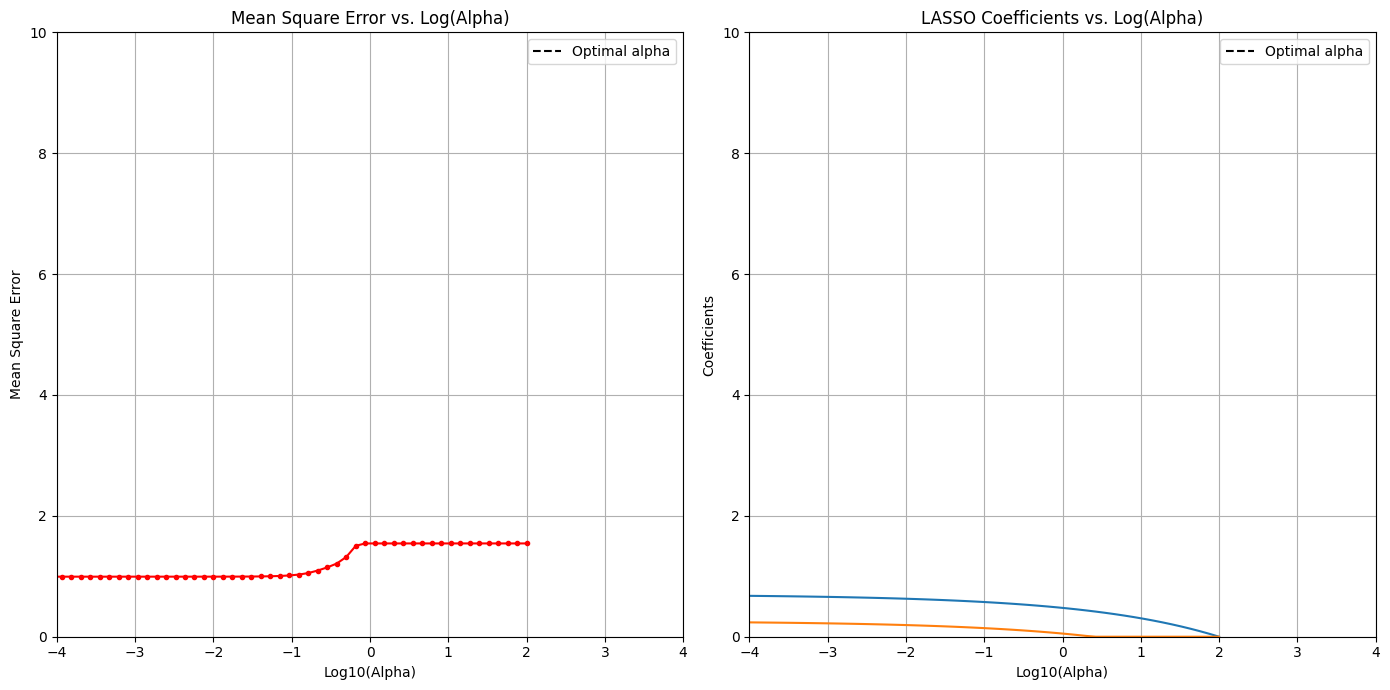

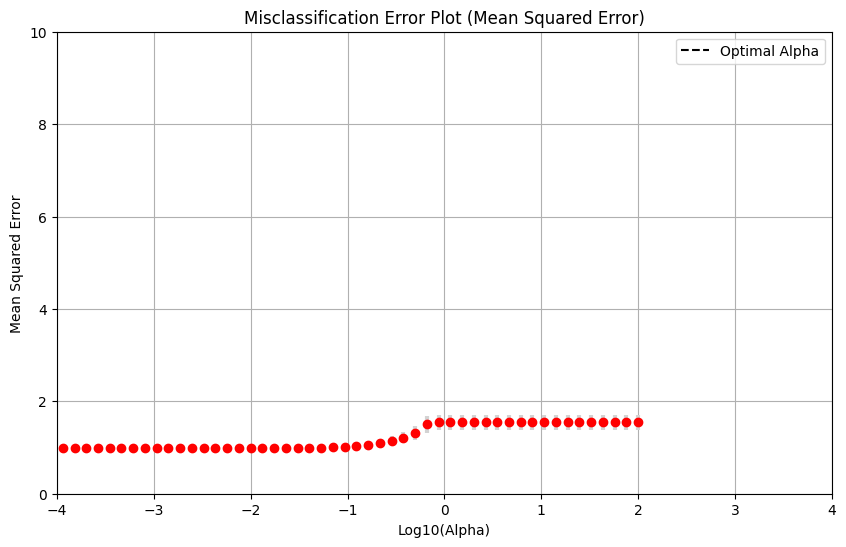

In [31]:

# Check for missing values
print(combined_pca_df.isnull().sum())

# Fill or drop missing values as needed
combined_pca_df.dropna(inplace=True)

# Create a synthetic target variable for the analysis
np.random.seed(42)
combined_pca_df['target'] = combined_pca_df['PC1'] * 0.5 + combined_pca_df['PC2'] * 0.3 + np.random.normal(size=len(combined_pca_df))

# Features and target variable
X = combined_pca_df[['PC1', 'PC2']]
y = combined_pca_df['target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Perform LASSO regression with cross-validation
lasso_cv = LassoCV(alphas=np.logspace(-10, 2, 100), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Optimal alpha
optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Coefficients
lasso_coefs = lasso_cv.coef_
print(f"LASSO coefficients: {lasso_coefs}")

# Mean square error for each alpha
mse_path = lasso_cv.mse_path_.mean(axis=1)

# Plot the mean square error for each alpha (log scale)
plt.figure(figsize=(14, 7))

# Plot A: Mean square error
plt.subplot(1, 2, 1)
plt.plot(np.log10(lasso_cv.alphas_), mse_path, 'r.-')
plt.axvline(np.log10(optimal_alpha), linestyle='--', color='k', label='Optimal alpha')
plt.xlabel('Log10(Alpha)')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs. Log(Alpha)')
plt.xlim([-4, 4])
plt.ylim([0, 10])
plt.legend()
plt.grid(True)

# Plot B: Coefficients as a function of the regularization
plt.subplot(1, 2, 2)
plt.plot(np.log10(lasso_cv.alphas_), lasso_cv.path(X_train, y_train)[1].T)
plt.axvline(np.log10(optimal_alpha), linestyle='--', color='k', label='Optimal alpha')
plt.xlabel('Log10(Alpha)')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients vs. Log(Alpha)')
plt.legend()
plt.xlim([-4, 4])
plt.ylim([0, 10])
plt.grid(True)
plt.savefig('MEAN_SQUARE_LASSO.png')  # Save the plot
plt.tight_layout()
plt.show()

# Plot the Mean Squared Error for each alpha to visualize misclassification error
plt.figure(figsize=(10, 6))
plt.errorbar(np.log10(lasso_cv.alphas_), mse_path, yerr=lasso_cv.mse_path_.std(axis=1), fmt='o', color='red', ecolor='lightgray', elinewidth=3, capsize=0)
plt.axvline(np.log10(optimal_alpha), linestyle='--', color='black', label='Optimal Alpha')
plt.xlabel('Log10(Alpha)')
plt.ylabel('Mean Squared Error')
plt.title('Misclassification Error Plot (Mean Squared Error)')
plt.legend()
plt.xlim([-4, 4])
plt.ylim([0, 10])

plt.savefig('Misclassification Error Plot.png')  # Save the plot
plt.grid(True)
plt.show()


# DKFLJDKLFKLDJKLF

Optimal alpha: 1e-10
Ridge coefficients: [0.6952334  0.26136556]


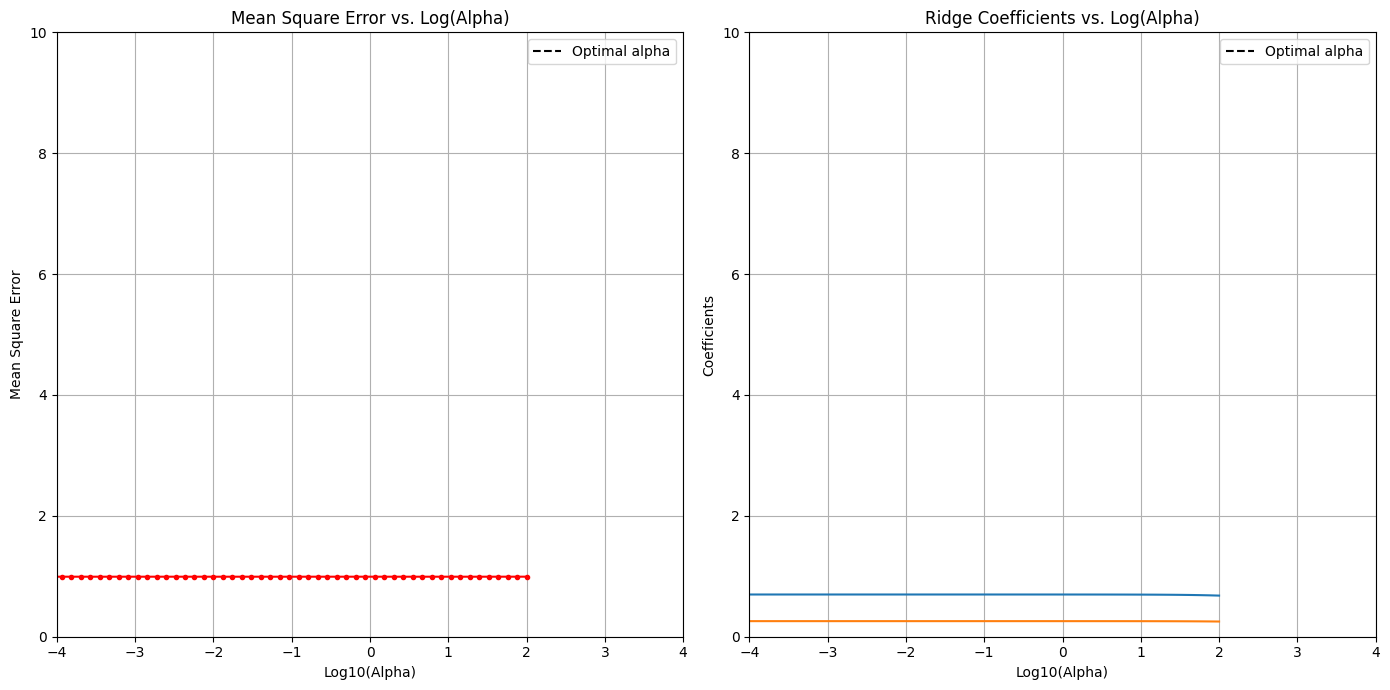

In [32]:
# Perform Ridge regression with cross-validation
alphas = np.logspace(-10, 2, 100)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Optimal alpha
optimal_alpha = ridge_cv.alpha_
print(f"Optimal alpha: {optimal_alpha}")

# Coefficients
ridge_coefs = ridge_cv.coef_
print(f"Ridge coefficients: {ridge_coefs}")

# Mean square error for each alpha
mse_path = ridge_cv.cv_values_.mean(axis=0)

# Plot the mean square error for each alpha (log scale)
plt.figure(figsize=(14, 7))

# Plot A: Mean square error
plt.subplot(1, 2, 1)
plt.plot(np.log10(alphas), mse_path, 'r.-')
plt.axvline(np.log10(optimal_alpha), linestyle='--', color='k', label='Optimal alpha')
plt.xlabel('Log10(Alpha)')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs. Log(Alpha)')
plt.legend()
plt.grid(True)
plt.xlim([-4, 4])
plt.ylim([0, 10])

# Plot B: Coefficients as a function of the regularization
plt.subplot(1, 2, 2)
ridge_path_coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_path_coefs.append(ridge.coef_)

ridge_path_coefs = np.array(ridge_path_coefs)

for coef in ridge_path_coefs.T:
    plt.plot(np.log10(alphas), coef)

plt.axvline(np.log10(optimal_alpha), linestyle='--', color='k', label='Optimal alpha')
plt.xlabel('Log10(Alpha)')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients vs. Log(Alpha)')
plt.legend()
plt.grid(True)
plt.xlim([-4, 4])
plt.ylim([0, 10])
plt.legend()
plt.savefig('Ridge Coefficients.png')  # Save the plot
plt.tight_layout()
plt.show()

# DJFLDSJFKLSDJKLF
